# Conversion functions

In this example, we will demonstrate how to use conversion functions. These functions allow to convert failure probabilities into reliability indices and return periods, and vice versa.

First, let's import the necessary class:

In [1]:
from probabilistic_library import StandardNormal

We will consider the following list of failure probabilities:

In [2]:
p = [0.9, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]

The failure probabilities can be converted to reliability indices:

In [3]:
reliability_index = [-StandardNormal.get_u_from_p(val) for val in p]
print(reliability_index)

[-1.2815515655446008, -0.0, 1.2815515655446008, 2.3263478740408408, 3.090232306167813, 3.71901648545568, 4.2648907939228256]


The reliability indices can be converted to return periods:

In [4]:
return_period =  [StandardNormal.get_t_from_u(val) for val in reliability_index]
print(return_period)

[0.43429448190325176, 1.4426950408889634, 9.491221581029905, 99.49916247342207, 999.4999166249727, 9999.499991667351, 99999.49999851154]


The frequency of a failure event can be obtained as follows:

In [5]:
freq = [1/val for val in return_period]
print(freq)

[2.302585092994046, 0.6931471805599453, 0.10536051565782628, 0.01005033585350145, 0.0010005003335835344, 0.00010000500033334732, 1.0000050000398848e-05]


The return periods can be converted back to reliability indices:

In [6]:
calculated_reliability_index = [StandardNormal.get_u_from_t(val) for val in return_period]
print(calculated_reliability_index)

[-1.2815515655446008, 0.0, 1.2815515655446008, 2.3263478740408408, 3.090232306167813, 3.7190164854557084, 4.264890793921361]


And the reliability indices can be converted back to failure probabilities. The obtained failure probabilities should match the original list of failure probabilities:

In [7]:
calculated_p = [1-StandardNormal.get_p_from_u(val) for val in calculated_reliability_index]
print(calculated_p)

[0.9, 0.5, 0.09999999999999998, 0.010000000000000009, 0.0010000000000000009, 9.999999999998899e-05, 1.0000000000065512e-05]


Let’s plot the relationship between the reliability index (`beta`) and the failure probability:

Text(0, 0.5, 'Failure probability (-)')

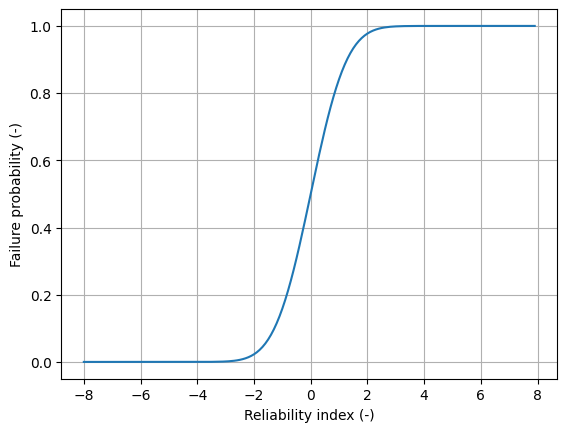

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.arange(-8.0, 8.0, 0.1)
prob = [StandardNormal.get_p_from_u(val) for val in beta]
plt.plot(beta, prob)
plt.grid()
plt.xlabel('Reliability index (-)')
plt.ylabel('Failure probability (-)')
plt.show()
